In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm

In [2]:
filename = "bike-sharing/hour.csv"
rides =pd.read_csv(filename)

In [3]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
rides.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13112,13113,2012-07-05,3,1,7,13,0,4,1,1,0.92,0.8333,0.33,0.2239,129,181,310
13744,13745,2012-07-31,3,1,7,21,0,2,1,1,0.68,0.6364,0.79,0.1940,60,292,352
4290,4291,2011-07-02,3,0,7,16,0,6,0,1,0.88,0.7424,0.22,0.2239,206,192,398
2060,2061,2011-03-31,2,0,3,17,0,4,1,2,0.30,0.2879,0.87,0.2537,15,153,168
14151,14152,2012-08-17,3,1,8,20,0,5,1,2,0.72,0.2424,0.58,0.2239,97,262,359


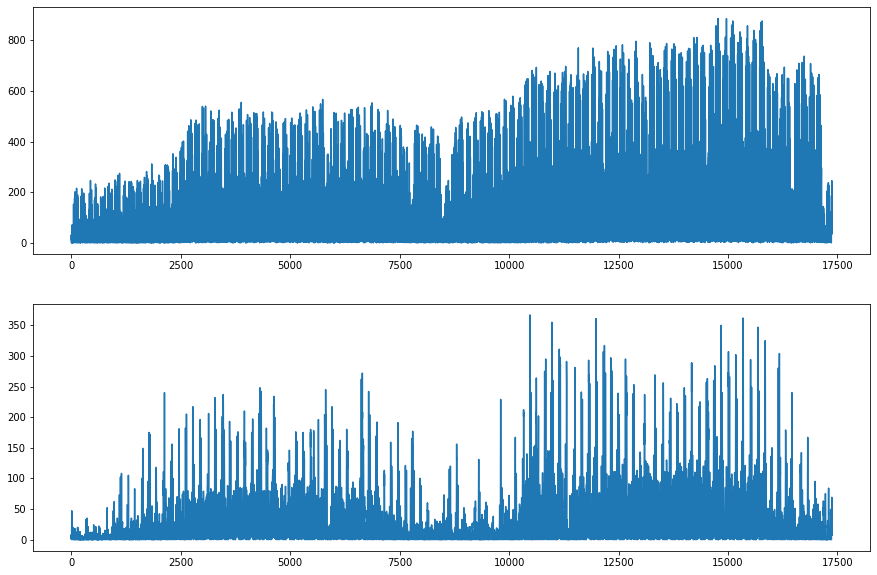

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

rides.registered.plot(ax=axes[0])
rides.casual.plot(ax=axes[1])

fig.savefig('output/registered-and-casual.svg',format='svg',dpi=150)#输出

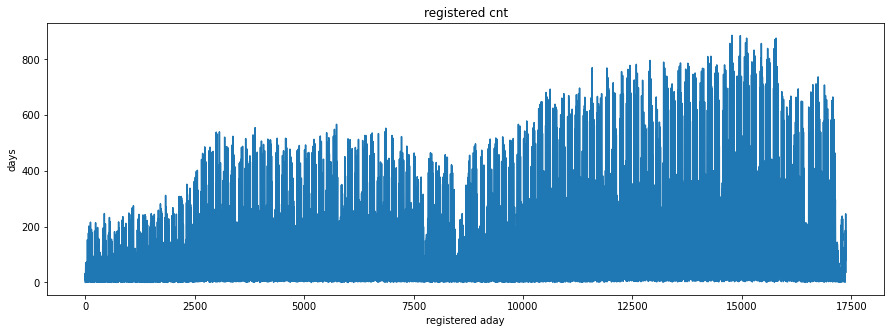

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
plt.title("registered cnt")
plt.xlabel("registered aday")
plt.ylabel("days")
rides.registered.plot(ax=axes)
fig.savefig('output/registeredl.svg',format='svg',dpi=150)

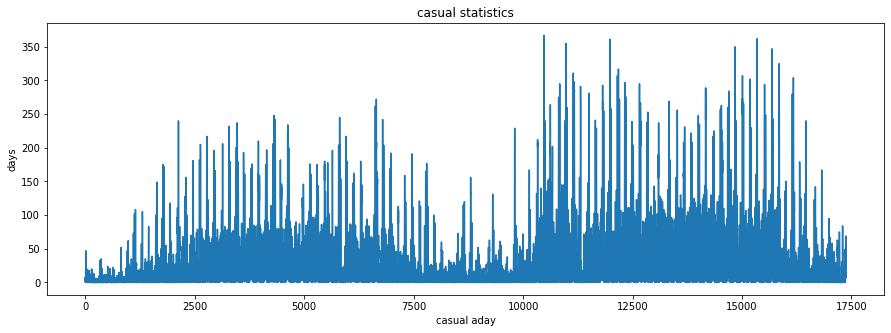

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
plt.title("casual statistics")
plt.xlabel("casual aday")
plt.ylabel("days")
rides.casual.plot(ax=axes)
fig.savefig('output/casual.svg',format='svg',dpi=150)

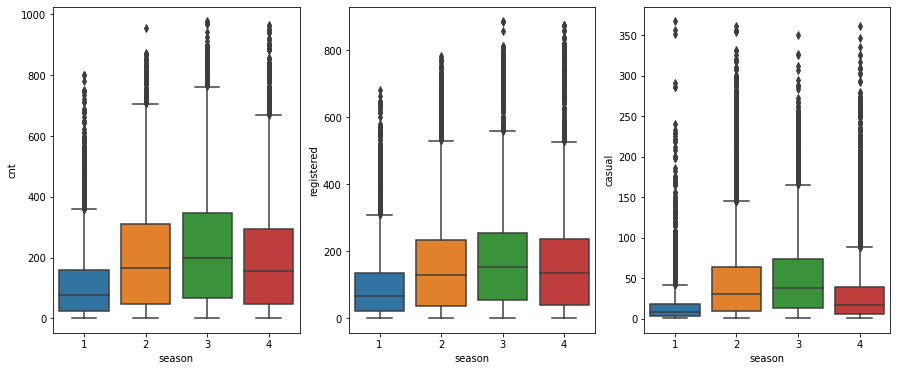

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

sns.boxplot(y=rides.query("cnt>0")['cnt'], x=rides.season, ax=axes[0])
sns.boxplot(y=rides.query("registered>0")['registered'], x=rides.season, ax=axes[1])
sns.boxplot(y=rides.query("casual>0")['casual'], x=rides.season, ax=axes[2])

fig.savefig('output/cnt-registered-casual-season.svg',format='svg',dpi=150)

c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


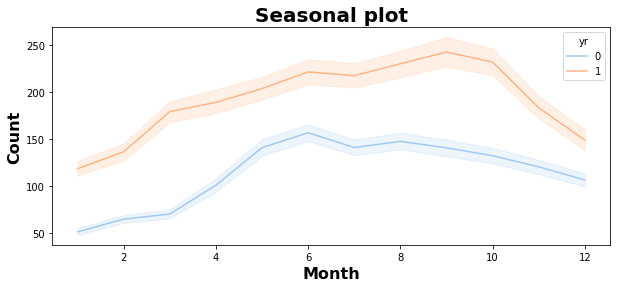

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))

palette = sns.color_palette("pastel", 2)
sns.lineplot(rides['mnth'], rides['registered'], hue=rides['yr'], palette=palette)
ax.set_title('Seasonal plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Count', fontsize = 16, fontdict=dict(weight='bold'))

fig.savefig('output/seanal-cnt-year.svg',format='svg',dpi=150)